## KNN

The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method employed to tackle classification and regression problems

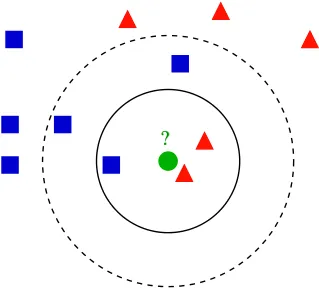

KNN is a non-parametric, lazy classification model that predicts a class based on the features of known observations that are close to it.

if we plot these points on a graph, we may be able to locate some clusters or groups. Now, given an unclassified point, we can assign it to a group by observing what group its nearest neighbors belong to. This means a point close to a cluster of points classified as ‘Red’ has a higher probability of getting classified as ‘Red’.

**Algorithm Overview**

Instance-Based Learning: KNN is a lazy learner that classifies a data point based on the majority class of its nearest neighbors.
Non-Parametric: It doesn't make assumptions about the underlying data distribution.

**Distance Metric**

Euclidean Distance: Commonly used, calculated as the square root of the sum of the squared differences between coordinates.
Other Metrics: Can also use Manhattan, Minkowski, or custom distance functions depending on the problem.

**Parameter K**

Number of Neighbors: K specifies the number of nearest neighbors to consider for classification.
Choosing K: A small K can be noisy and lead to overfitting; a large K can smooth out the decision boundary but may underfit.

**Voting Mechanism**

Majority Voting: For classification, the class label is determined by a majority vote among the K nearest neighbors.
Weighted Voting: Can assign weights to neighbors based on their distance, giving closer neighbors more influence.

**Computational Complexity**

Training Phase: Minimal, as KNN requires storing the entire training dataset.
Prediction Phase: Computationally expensive, as it involves calculating distances to all training samples for each prediction.

**Scalability**

Large Datasets: Can become impractical with large datasets due to the need to compute distances for every query point.
Dimensionality: High-dimensional data can suffer from the "curse of dimensionality," making distance metrics less effective.

 ## k Nearest Neighbours intuition


It simply calculates the distance between a sample data point and all the other training data points. The distance can be Euclidean distance or Manhattan distance. Then, it selects the k nearest data points where k can be any integer. Finally, it assigns the sample data point to the class to which the majority of the k data points belong.

Now, we will see kNN algorithm in action. Suppose, we have a dataset with two variables which are classified as Red and Blue.

## Distance Metrics Used in KNN Algorithm

Euclidean Distance

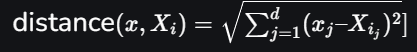
 
 Manhattan Distance
 
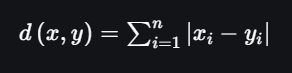
 
 Minkowski Distance
 
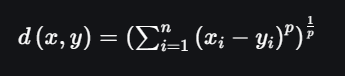

In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [3]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'Social_Network_Ads.csv'))

In [4]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
#checking df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
#checking stats
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
#checked the data distribution
res = df.Purchased.value_counts()/400
res

Purchased
0    0.6425
1    0.3575
Name: count, dtype: float64

In [9]:
#data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## scatter plot

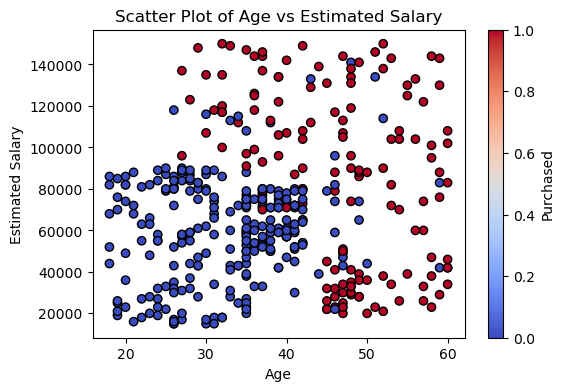

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(df.Age, df.EstimatedSalary, c=df.Purchased, cmap='coolwarm', edgecolor='k')
plt.title('Scatter Plot of Age vs Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.colorbar(label='Purchased')
plt.show()

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train.shape

(300, 2)

In [14]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [15]:
X_test.shape

(100, 2)

In [16]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

# Model fitting

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
classifier.score(X_train, y_train)

0.91

## Predicting a new result

In [19]:
sc.transform([[19,19000]])

array([[-1.89415691, -1.46656987]])

In [20]:
classifier.predict(sc.transform([[19,19000]]))

array([0], dtype=int64)

## Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## Making the Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

In [24]:
accuracy_score(y_test, y_pred)

0.93

<Axes: >

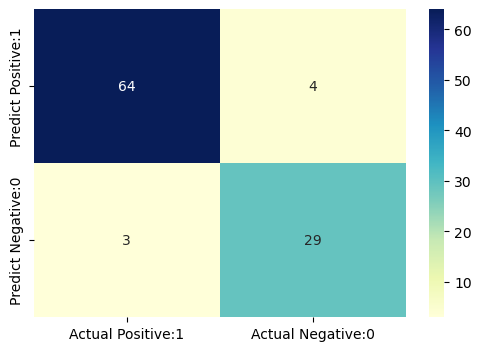

In [25]:
# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[64  4]
 [ 3 29]]

True Positives(TP) =  64

True Negatives(TN) =  29

False Positives(FP) =  4

False Negatives(FN) =  3


#### hyper-paramtere

## Analisng the accuracy by increasing the number of K

In [27]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

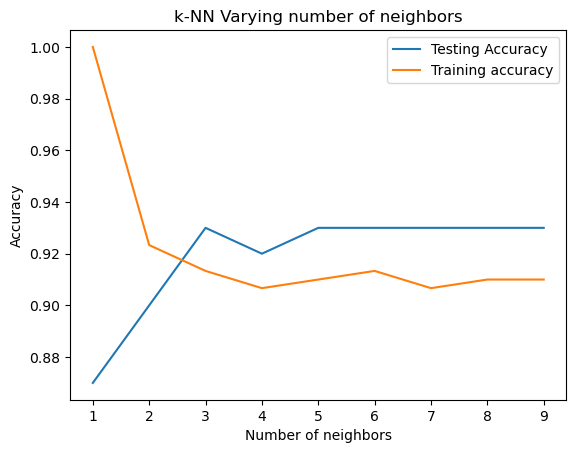

In [28]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Model Performence

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## Visualising the Training set results

C:\Users\Shubham_Rawat1\AppData\Local\Temp\ipykernel_8212\709025995.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


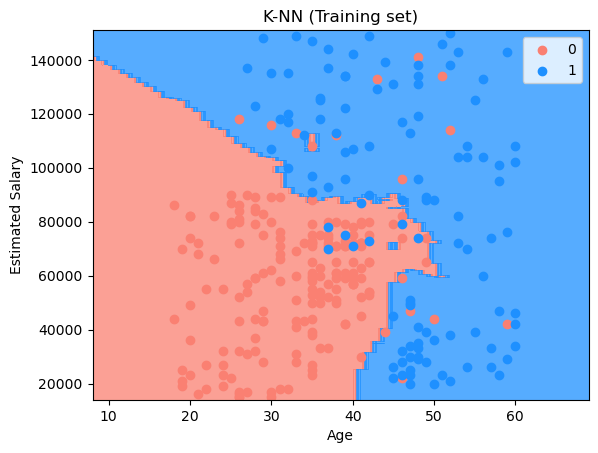

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\Shubham_Rawat1\AppData\Local\Temp\ipykernel_8212\2197279724.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


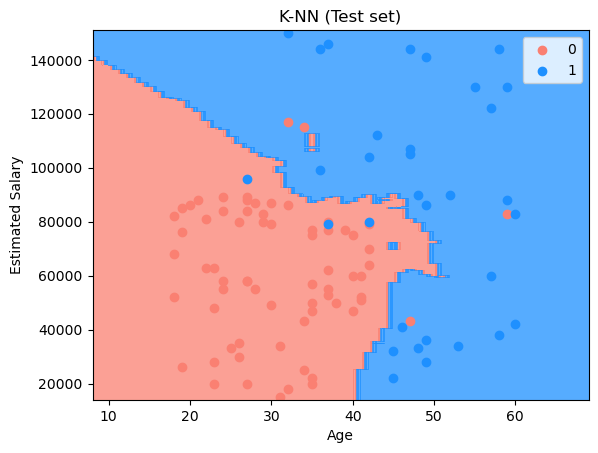

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Cross Validation

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

Hyperparameter tuning

The value of k (i.e 5) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In [32]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [49]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [50]:
knn_cv.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [51]:
knn_cv.best_score_

0.7849999999999999

In [52]:
knn_cv.best_params_

{'n_neighbors': 1}

In [53]:
knn1 = KNeighborsClassifier(n_neighbors=1)

#Fit the model
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
knn1.score(X_test, y_test)

0.87

### What is diffrence between Manhattan | Euclidean Distance

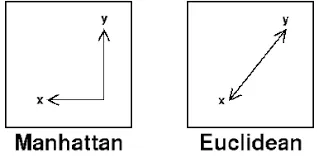

In [58]:
points = X_test[:10,:]
points

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441]])

In [56]:
y_test[:10]  #actual output

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [59]:
#lets check how this datapoint behave with above datapoint
point = sc.transform([[19,19000]])
point

array([[-1.89415691, -1.46656987]])

#### Calculate Manhattan distance 
**D(P1,P2)=∣x1−x2∣+∣y1−y2∣**

In [60]:
manhattan_distances = np.sum(np.abs(points - point), axis=1)

In [61]:
manhattan_distances

array([3.06088859, 2.78040029, 3.20813213, 2.82894344, 2.48330353,
       0.82125117, 1.30435962, 5.30769132, 1.51969631, 3.46873856])

#### Calculate Euclidean distance
**D(P1,P2)=(x1−x2)^2+(y1−y2)^2**

In [63]:
euclidean_distances = np.sqrt(np.sum((points - point) ** 2, axis=1))

In [64]:
euclidean_distances

array([2.25247406, 2.08525435, 2.26866046, 2.05252589, 1.82167781,
       0.79278836, 1.19403241, 3.99609153, 1.42411157, 2.85887716])

In [65]:
#euclidaince distance is the sorted distance between any 2 points
diff = manhattan_distances - euclidean_distances
diff

array([0.80841453, 0.69514593, 0.93947167, 0.77641755, 0.66162571,
       0.02846281, 0.11032721, 1.3115998 , 0.09558475, 0.6098614 ])

In [69]:
points_with_distances = np.column_stack((points, manhattan_distances, euclidean_distances, y_test[:10]))

# Print the result
print(points_with_distances)

[[-0.80480212  0.50496393  3.06088859  2.25247406  0.        ]
 [-0.01254409 -0.5677824   2.78040029  2.08525435  0.        ]
 [-0.30964085  0.1570462   3.20813213  2.26866046  0.        ]
 [-0.80480212  0.27301877  2.82894344  2.05252589  0.        ]
 [-0.30964085 -0.5677824   2.48330353  1.82167781  0.        ]
 [-1.10189888 -1.43757673  0.82125117  0.79278836  0.        ]
 [-0.70576986 -1.58254245  1.30435962  1.19403241  0.        ]
 [-0.21060859  2.15757314  5.30769132  3.99609153  1.        ]
 [-1.99318916 -0.04590581  1.51969631  1.42411157  0.        ]
 [ 0.8787462  -0.77073441  3.46873856  2.85887716  0.        ]]


In [70]:
# K = 3
# get the prediction chosse 3 nearset neighbour from each

# Sort by the last column (Euclidean distance)
sorted_array = points_with_distances[points_with_distances[:, -3].argsort()]
sorted_array

array([[-1.10189888, -1.43757673,  0.82125117,  0.79278836,  0.        ],
       [-0.70576986, -1.58254245,  1.30435962,  1.19403241,  0.        ],
       [-1.99318916, -0.04590581,  1.51969631,  1.42411157,  0.        ],
       [-0.30964085, -0.5677824 ,  2.48330353,  1.82167781,  0.        ],
       [-0.01254409, -0.5677824 ,  2.78040029,  2.08525435,  0.        ],
       [-0.80480212,  0.27301877,  2.82894344,  2.05252589,  0.        ],
       [-0.80480212,  0.50496393,  3.06088859,  2.25247406,  0.        ],
       [-0.30964085,  0.1570462 ,  3.20813213,  2.26866046,  0.        ],
       [ 0.8787462 , -0.77073441,  3.46873856,  2.85887716,  0.        ],
       [-0.21060859,  2.15757314,  5.30769132,  3.99609153,  1.        ]])

******************************************

## Standandrision

**Purpose**: Standardizes features by removing the mean and scaling to unit variance.
**Formula**: z = (x - u) / s
    
**u** : μ\muμ is the mean of the training samples.

**s** : σ\sigmaσ is the standard deviation of the training samples. ( Standard deviation is the square root of variance )


In [72]:
#lets check how this datapoint behave with above datapoint
point = sc.transform([[19,19000]])
point

array([[-1.89415691, -1.46656987]])

##### mean of test sample

In [ ]:
print(sc.mean_)
age_mean, sal_mean = sc.mean_[0], sc.mean_[1]

##### var of test sample

In [74]:
print(sc.var_)
age_var, sal_var = sc.var_[0], sc.var_[1]

array([1.01963956e+02, 1.18962306e+09])

In [79]:
#let check above with formula
# lets standarise the above point
x = 19
age_std = (x-age_mean) / np.sqrt(age_var)
age_std

-1.8941569057589915

In [81]:
# lets standarise the above point
y = 19000
sal_std = (y-sal_mean) / np.sqrt(sal_var)
sal_std

-1.4665698714314108

## random forest | KNN ( which to use)

Choosing between Random Forest and K-Nearest Neighbors (KNN) depends on various factors, 
including the nature of your data, the problem you're trying to solve, and your specific requirements like interpretability, 
computational resources, and the presence of noise in the data.

Key Considerations:
    
**Nature of the Data:**

    KNN: Works well with smaller datasets and when the decision boundaries are not complex. Sensitive to the choice of 𝑘
    k (number of neighbors) and to feature scaling.

    Random Forest: More robust to noise, handles large datasets well, and can model complex decision boundaries. It provides feature importance and is generally less sensitive to hyperparameters.
    Computational 

**Complexity:**

    KNN: Computation increases with the size of the dataset because it requires calculating the distance between 
        the test sample and every training sample.
        
    Random Forest: Training can be computationally intensive, but prediction is faster compared to KNN.
        
**Interpretability:**

    KNN: Simple and easy to understand.
        
    Random Forest: More complex, but it provides insights through feature importance.
    
**Presence of Noise:**

    KNN: Sensitive to noisy data and outliers.

    Random Forest: More robust to noise and outliers due to the averaging process.

In [ ]:
# Ref :-
KNN :- https://youtu.be/CQveSaMyEwM?si=7VGGea0rV8f6EK6F
https://medium.com/analytics-vidhya/euclidean-and-manhattan-distance-metrics-in-machine-learning-a5942a8c9f2f
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html